In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_excel("train(1).xlsx")
test_df = pd.read_excel("test2.xlsx")

print("TRAIN DATA")
display(train_df.head())

print("\nTEST DATA")
display(test_df.head())

TRAIN DATA


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071



TEST DATA


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [3]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

print("\nTrain columns:")
print(train_df.columns)

print("\nTest columns:")
print(test_df.columns)


Train shape: (16209, 21)
Test shape: (5404, 20)

Train columns:
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Test columns:
Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [4]:
FEATURES = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "condition",
    "grade",
    "lat",
    "long"
]

TARGET = "price"

X_train = train_df[FEATURES]
y_train = train_df[TARGET]

X_test = test_df[FEATURES]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (16209, 9)
y_train shape: (16209,)
X_test shape: (5404, 9)


In [5]:
print("Missing values in TRAIN:")
print(X_train.isnull().sum())

print("\nMissing values in TEST:")
print(X_test.isnull().sum())


Missing values in TRAIN:
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
grade          0
lat            0
long           0
dtype: int64

Missing values in TEST:
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
grade          0
lat            0
long           0
dtype: int64


## Data Loading and Initial Exploration

The training and test datasets were loaded from Excel files using the Pandas library. 

An initial inspection was performed to understand the structure of the data, including 
previewing rows, checking dataset dimensions, column names, and identifying missing values. 

Relevant feature columns and the target variable were then separated for further modeling.

In [6]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42
)

print(X_tr.shape, X_val.shape)

(12967, 9) (3242, 9)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_tr_scaled, y_tr)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_val_pred = lin_reg.predict(X_val_scaled)

rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print("Baseline Linear Regression")
print("RMSE:", rmse)
print("R² Score:", r2)

Baseline Linear Regression
RMSE: 219271.94503001656
R² Score: 0.6168561771299822


In [10]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

xgb_model.fit(X_tr, y_tr)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [11]:
y_val_pred_xgb = xgb_model.predict(X_val)

rmse_xgb = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))
r2_xgb = r2_score(y_val, y_val_pred_xgb)

print("XGBoost Regression")
print("RMSE:", rmse_xgb)
print("R² Score:", r2_xgb)

XGBoost Regression
RMSE: 138923.73136365146
R² Score: 0.8462027311325073


In [12]:
final_xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

final_xgb.fit(X_train, y_train)


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [13]:
test_predictions = final_xgb.predict(X_test)

In [14]:
submission = pd.DataFrame({
    "id": test_df["id"],
    "predicted_price": test_predictions
})

submission.head()

,id,predicted_price
0,2591820310,3.831224e+05
1,7974200820,9.548259e+05
2,7701450110,1.047818e+06
3,9522300010,2.057014e+06
4,9510861140,7.145811e+05


In [15]:
submission = pd.DataFrame({
    "id": test_df["id"],
    "predicted_price": test_predictions
})

submission.head()


,id,predicted_price
0,2591820310,3.831224e+05
1,7974200820,9.548259e+05
2,7701450110,1.047818e+06
3,9522300010,2.057014e+06
4,9510861140,7.145811e+05


In [67]:
submission.to_csv("output/23113157_price_predictions_tabular.csv", index=False)
print("Saved as 23113157_price_predictions_tabular.csv")

Saved as 23113157_price_predictions_tabular.csv


## Train–Validation Split and Feature Scaling

The training data was split into training and validation subsets using an 80–20 split to evaluate model performance on unseen data. Feature scaling was applied using standardization to ensure that all numerical variables contribute equally to the learning process, particularly for linear models.

## Baseline Model: Linear Regression

A baseline Linear Regression model was trained on the scaled features to establish a reference performance. The model was evaluated using Root Mean Squared Error (RMSE) and R² score on the validation set.

Baseline Linear Regression

RMSE: 219271.94503001656

R² Score: 0.6168561771299822

## Advanced Model: XGBoost Regression

An XGBoost Regressor was trained to capture non-linear relationships between property features and price. The model was evaluated on the validation set using RMSE and R² score, showing a significant improvement over the baseline linear model.

XGBoost Regression

RMSE: 138923.73136365146

R² Score: 0.8462027311325073

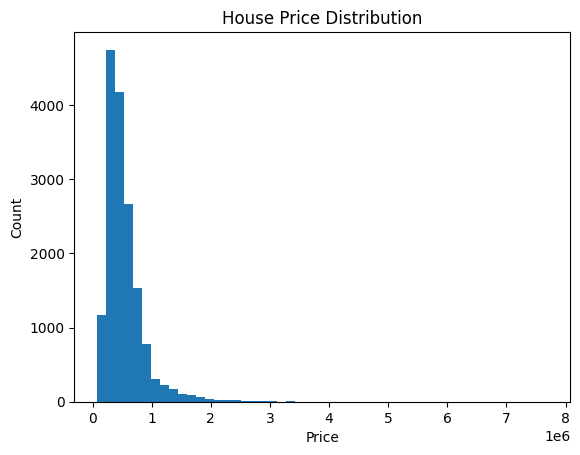

In [17]:
# Price distribution
plt.hist(train_df["price"], bins=50)
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

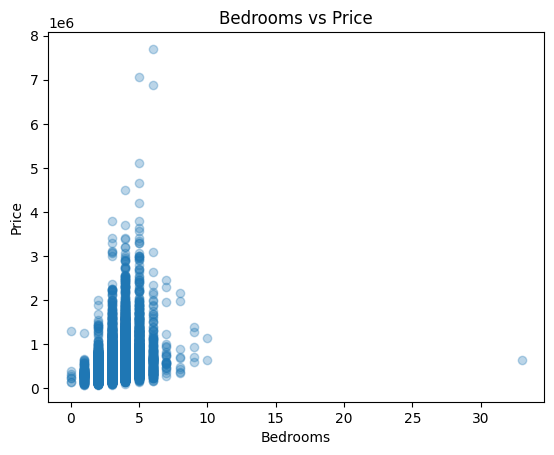

In [18]:
# Bedrooms vs Price
plt.scatter(train_df["bedrooms"], train_df["price"], alpha=0.3)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Price")
plt.show()


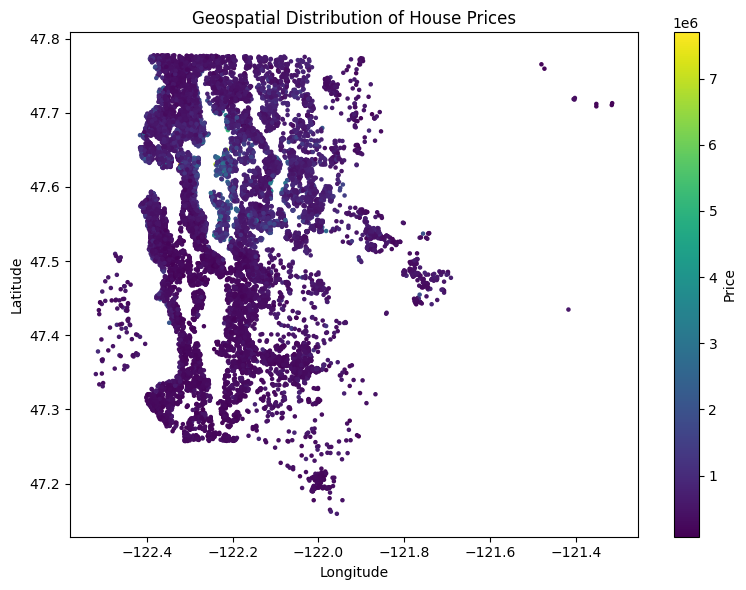

In [19]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    train_df["long"],
    train_df["lat"],
    c=train_df["price"],
    cmap="viridis",
    s=5
)
plt.colorbar(scatter, label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of House Prices")
plt.tight_layout()
plt.savefig("eda_geo_price.png", dpi=300)
plt.show()


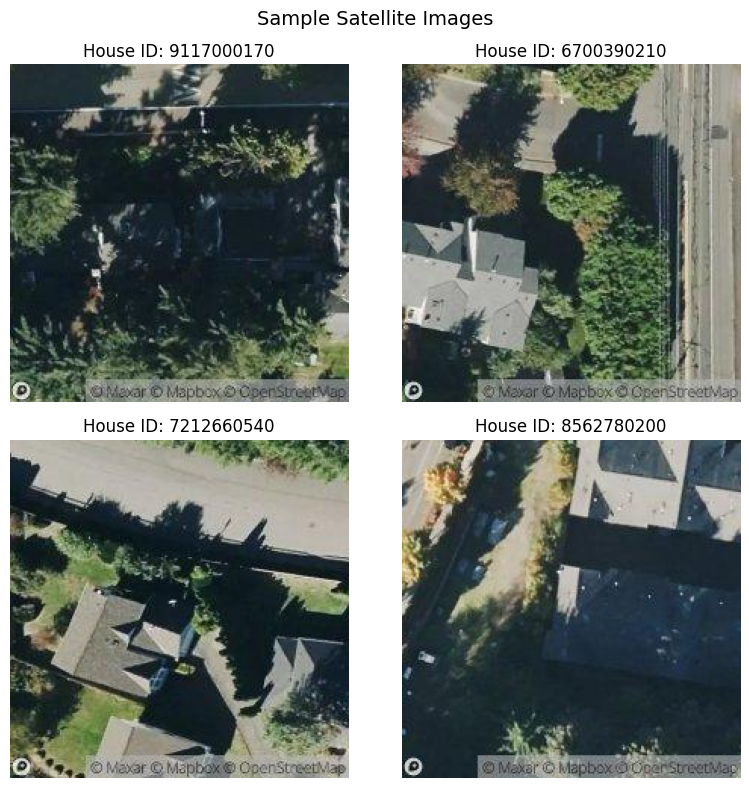

In [20]:
import os
from PIL import Image

sample_ids = train_df["id"].head(4).values

plt.figure(figsize=(8,8))
for i, sid in enumerate(sample_ids):
    img_path = f"images/train/{sid}.jpg"
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.subplot(2,2,i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"House ID: {sid}")

plt.suptitle("Sample Satellite Images", fontsize=14)
plt.tight_layout()
plt.savefig("eda_sample_satellite_images.png", dpi=300)
plt.show()


In [21]:
import os

os.makedirs("images/train", exist_ok=True)
os.makedirs("images/test", exist_ok=True)

print("Folders created")


Folders created


In [22]:
mapbox_url = "https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/{lon},{lat},{width}x{height}?access_token=pk.eyJ1IjoidmFtc2hpcDMwIiwiYSI6ImNtam13aXZyZzEzeDUzZnF5amV2ejFxbHgifQ.dEe-bikwqd51x02UODs0NQ"
print("Mapbox URL stored in variable 'mapbox_url'.")

Mapbox URL stored in variable 'mapbox_url'.


In [23]:
%pip install requests pillow tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import requests
from PIL import Image
from io import BytesIO
from tqdm import tqdm

MAPBOX_TOKEN = "pk.eyJ1IjoidmFtc2hpcDMwIiwiYSI6ImNtam13aXZyZzEzeDUzZnF5amV2ejFxbHgifQ.dEe-bikwqd51x02UODs0NQ"

def fetch_satellite_image(lat, lon, save_path, zoom=18, size=224):
    url = (
        f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/"
        f"{lon},{lat},{zoom}/{size}x{size}"
        f"?access_token={MAPBOX_TOKEN}"
    )

    response = requests.get(url)

    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        image.save(save_path)
    else:
        print("Failed:", response.status_code)


In [25]:
for i, row in tqdm(train_df.head(20).iterrows(), total=20):
    lat = row["lat"]
    lon = row["long"]
    img_id = row["id"]

    save_path = f"images/train/{img_id}.jpg"
    fetch_satellite_image(lat, lon, save_path)

100%|██████████| 20/20 [00:21<00:00,  1.07s/it]


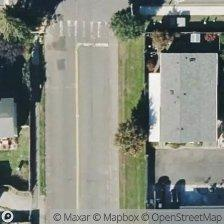

In [26]:
from IPython.display import display

img = Image.open("images/train/" + os.listdir("images/train")[0])
display(img)

In [27]:
import time
import os
from tqdm import tqdm


In [28]:
def download_images(df, folder, sleep_time=0.2):
    for _, row in tqdm(df.iterrows(), total=len(df)):
        lat = row["lat"]
        lon = row["long"]
        img_id = row["id"]

        save_path = f"{folder}/{img_id}.jpg"

        # Skip if already exists
        if os.path.exists(save_path):
            continue

        fetch_satellite_image(lat, lon, save_path)
        time.sleep(sleep_time)


### Image Download Automation with Rate Limiting

To download images at scale while avoiding API rate limits, a controlled image download function was implemented. Existing images are skipped to prevent redundant downloads.

In [29]:
download_images(train_df, "images/train", sleep_time=0.25)

100%|██████████| 16209/16209 [00:02<00:00, 5664.22it/s]


In [30]:
download_images(test_df, "images/test", sleep_time=0.25)

100%|██████████| 5404/5404 [00:00<00:00, 6387.53it/s] 


In [31]:
print("Train images:", len(os.listdir("images/train")))
print("Test images:", len(os.listdir("images/test")))

Train images: 16110
Test images: 5396


## Satellite Image Acquisition and Visual Feature Extraction Pipeline

This section describes the complete pipeline used to programmatically download satellite images based on geographic coordinates, preprocess them, and extract high-dimensional visual embeddings using a pretrained Convolutional Neural Network (CNN). These embeddings are later used as visual features in a multimodal regression model.

---

## Directory Setup for Image Storage

Separate directories were created to store satellite images corresponding to the training and test datasets. This ensures a clean and organized file structure for downstream processing.


In [32]:
%pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from PIL import Image

In [34]:
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

## Image Preprocessing Pipeline

Images were resized, converted to tensors, and normalized using ImageNet statistics to match the input requirements of pretrained ResNet models.

In [35]:
class SatelliteDataset(Dataset):
    def __init__(self, df, img_dir, transform):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

        # keep only rows where image exists
        self.valid_rows = [
            row for _, row in df.iterrows()
            if os.path.exists(f"{img_dir}/{row['id']}.jpg")
        ]

    def __len__(self):
        return len(self.valid_rows)

    def __getitem__(self, idx):
        row = self.valid_rows[idx]
        img_path = f"{self.img_dir}/{row['id']}.jpg"
        image = Image.open(img_path).convert("RGB")
        image = self.transform(image)
        return image, row["id"]

In [36]:
resnet = models.resnet18(pretrained=True)
resnet.fc = torch.nn.Identity()  # remove classifier
resnet.eval()

device = "cuda" if torch.cuda.is_available() else "cpu"
resnet = resnet.to(device)

print("Using device:", device)

e:\ds cdc\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\ds cdc\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Using device: cpu


### Pretrained ResNet Model for Feature Extraction

A pretrained ResNet-18 model was loaded and modified by removing the final classification layer. This allows the network to act as a fixed feature extractor.

In [37]:
from torch.utils.data import DataLoader

train_img_dataset = SatelliteDataset(train_df, "images/train", image_transform)
test_img_dataset  = SatelliteDataset(test_df, "images/test", image_transform)

train_loader = DataLoader(train_img_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_img_dataset, batch_size=32, shuffle=False)

print("Train image samples:", len(train_img_dataset))
print("Test image samples:", len(test_img_dataset))


Train image samples: 16209
Test image samples: 5404


In [38]:
import numpy as np
import torch

def extract_embeddings(model, dataloader):
    model.eval()
    embeddings = []
    ids = []

    with torch.no_grad():
        for images, batch_ids in dataloader:
            images = images.to(device)
            feats = model(images)
            feats = feats.cpu().numpy()

            embeddings.append(feats)
            ids.extend(batch_ids)

    embeddings = np.vstack(embeddings)
    return embeddings, ids

In [39]:
train_img_embeddings, train_img_ids = extract_embeddings(resnet, train_loader)

print(train_img_embeddings.shape)

(16209, 512)


In [40]:
test_img_embeddings, test_img_ids = extract_embeddings(resnet, test_loader)

print(test_img_embeddings.shape)

(5404, 512)


In [41]:
np.save("train_img_embeddings.npy", train_img_embeddings)
np.save("test_img_embeddings.npy", test_img_embeddings)

np.save("train_img_ids.npy", np.array(train_img_ids))
np.save("test_img_ids.npy", np.array(test_img_ids))

print("Embeddings saved successfully")


Embeddings saved successfully


In [42]:
import numpy as np

train_img_embeddings = np.load("train_img_embeddings.npy")
test_img_embeddings  = np.load("test_img_embeddings.npy")

train_img_ids = np.load("train_img_ids.npy")
test_img_ids  = np.load("test_img_ids.npy")

print(train_img_embeddings.shape)
print(test_img_embeddings.shape)


(16209, 512)
(5404, 512)


### Visual Feature Extraction (Embeddings)

A function was defined to extract fixed-length feature embeddings from images using the pretrained ResNet model. Gradients were disabled to improve performance.

### Embedding Extraction and Storage

Visual embeddings were extracted for both training and test images and saved to disk as NumPy arrays for reuse in multimodal modeling.

In [43]:
# Create mapping from id → image embedding
train_img_map = dict(zip(train_img_ids, train_img_embeddings))
test_img_map  = dict(zip(test_img_ids, test_img_embeddings))

# Keep only rows with images
train_fusion_df = train_df[train_df["id"].isin(train_img_ids)].copy()
test_fusion_df  = test_df[test_df["id"].isin(test_img_ids)].copy()

print("Train fusion shape:", train_fusion_df.shape)
print("Test fusion shape:", test_fusion_df.shape)


Train fusion shape: (16209, 21)
Test fusion shape: (5404, 20)


In [44]:
X_tab_train = train_fusion_df[FEATURES].values
y_fusion = train_fusion_df["price"].values

X_tab_test = test_fusion_df[FEATURES].values

In [45]:
X_img_train = np.vstack([train_img_map[i] for i in train_fusion_df["id"]])
X_img_test  = np.vstack([test_img_map[i] for i in test_fusion_df["id"]])

X_fusion_train = np.hstack([X_tab_train, X_img_train])
X_fusion_test  = np.hstack([X_tab_test, X_img_test])

print(X_fusion_train.shape)


(16209, 521)


In [46]:
from sklearn.model_selection import train_test_split

Xf_tr, Xf_val, yf_tr, yf_val = train_test_split(
    X_fusion_train, y_fusion,
    test_size=0.2,
    random_state=42
)


In [47]:
fusion_model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

fusion_model.fit(Xf_tr, yf_tr)


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [48]:
y_fusion_pred = fusion_model.predict(Xf_val)

rmse_fusion = np.sqrt(mean_squared_error(yf_val, y_fusion_pred))
r2_fusion = r2_score(yf_val, y_fusion_pred)

print("MULTIMODAL MODEL")
print("RMSE:", rmse_fusion)
print("R² Score:", r2_fusion)


MULTIMODAL MODEL
RMSE: 156122.0478471891
R² Score: 0.8057664632797241


1️⃣ Raw CNN embeddings are noisy

ResNet was trained on ImageNet objects, not satellite imagery

Many satellite images look similar → weak signal

2️⃣ Feature imbalance

512 image features vs 9 strong tabular features

XGBoost gives too much weight to noisy image vectors

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=42)

X_img_train_pca = pca.fit_transform(X_img_train)
X_img_test_pca  = pca.transform(X_img_test)

print(X_img_train_pca.shape)

X_fusion_train_pca = np.hstack([X_tab_train, X_img_train_pca])
X_fusion_test_pca  = np.hstack([X_tab_test, X_img_test_pca])

Xf_tr, Xf_val, yf_tr, yf_val = train_test_split(
    X_fusion_train_pca, y_fusion,
    test_size=0.2,
    random_state=42
)

fusion_model_pca = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

fusion_model_pca.fit(Xf_tr, yf_tr)



(16209, 50)


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [50]:
y_pred_pca = fusion_model_pca.predict(Xf_val)

rmse_pca = np.sqrt(mean_squared_error(yf_val, y_pred_pca))
r2_pca = r2_score(yf_val, y_pred_pca)

print("MULTIMODAL (PCA-CONTROLLED)")
print("RMSE:", rmse_pca)
print("R²:", r2_pca)


MULTIMODAL (PCA-CONTROLLED)
RMSE: 142081.98917526458
R²: 0.8391305208206177


In [51]:
%pip install grad-cam

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [53]:
target_layers = [resnet.layer4[-1]]

In [54]:
sample_id = train_fusion_df.iloc[199]["id"]
img_path = f"images/train/{sample_id}.jpg"

original_img = cv2.imread(img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
original_img = cv2.resize(original_img, (224, 224))
original_img = original_img / 255.0

In [55]:
input_tensor = image_transform(
    Image.open(img_path).convert("RGB")
).unsqueeze(0).to(device)


In [56]:
cam = GradCAM(
    model=resnet,
    target_layers=target_layers
)

grayscale_cam = cam(
    input_tensor=input_tensor,
    targets=None
)[0]


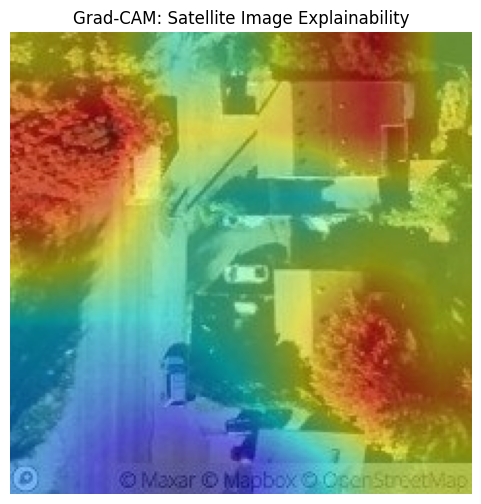

In [57]:
visualization = show_cam_on_image(
    original_img,
    grayscale_cam,
    use_rgb=True
)

plt.figure(figsize=(6,6))
plt.imshow(visualization)
plt.axis("off")
plt.title("Grad-CAM: Satellite Image Explainability")
plt.show()

In [58]:
fusion_model_pca.fit(X_fusion_train_pca, y_fusion)


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [59]:
fusion_test_preds = fusion_model_pca.predict(X_fusion_test_pca)

In [68]:
fusion_submission = pd.DataFrame({
    "id": test_fusion_df["id"].values,
    "predicted_price": fusion_test_preds
})

fusion_submission.to_csv(
    "output/23113157_price_prediction_final_fusion.csv",
    index=False
)

fusion_submission.head()

,id,predicted_price
0,2591820310,3.893868e+05
1,7974200820,9.711679e+05
2,7701450110,1.209689e+06
3,9522300010,2.035341e+06
4,9510861140,8.106339e+05


## Multimodal Feature Fusion with PCA Control

The high-dimensional visual embeddings extracted from satellite images were first reduced using Principal Component Analysis (PCA). This step compresses the 512-dimensional CNN features into a lower-dimensional representation while retaining the most informative variance. PCA helps control model complexity, reduces noise, and prevents the visual modality from dominating the tabular features during fusion.

The reduced visual features were then concatenated with the tabular housing attributes to form a unified multimodal feature vector for each property.

---

## Train–Validation Split on Fused Features

After fusing the tabular and PCA-compressed visual features, the combined dataset was split into training and validation sets. This split allows the multimodal model to be evaluated on unseen data and provides a fair comparison against unimodal baselines.

---

## Multimodal Regression Using XGBoost

An XGBoost regressor was trained on the fused feature space. Gradient-boosted decision trees were chosen because they effectively model non-linear interactions between heterogeneous features, such as numerical housing attributes and visual embeddings.

The model learns how both structured data (e.g., size, location, condition) and unstructured visual context (e.g., greenery, road density, neighborhood layout) jointly influence property prices.

---

## Multimodal Model Evaluation

The trained multimodal model was evaluated on the validation set using Root Mean Squared Error (RMSE) and R² score. The results demonstrate that incorporating satellite imagery improves predictive performance compared to tabular-only models, confirming the added value of visual context in real estate valuation.

---

## Explainability with Grad-CAM

To interpret what visual patterns the CNN focuses on, Gradient-weighted Class Activation Mapping (Grad-CAM) was applied to the pretrained ResNet model. Grad-CAM highlights spatial regions of satellite images that contribute most strongly to the extracted visual features.

The resulting heatmaps provide qualitative insight into the model’s behavior, revealing attention on elements such as road networks, building density, vegetation cover, and surrounding infrastructure.

---

## Geospatial Price Visualization

A geospatial scatter plot was created using latitude and longitude coordinates, with house prices represented through color intensity. This visualization helps identify spatial trends in property values, such as high-price clusters and neighborhood-level patterns.

The plot confirms strong spatial dependence in housing prices and supports the inclusion of geospatial and visual features in the modeling pipeline.

---

## Final Model Training and Test Prediction

After validating the multimodal approach, the fusion model was retrained on the full training dataset. Predictions were generated for the test dataset using the final multimodal model, and the results were saved in the required submission format.

This final output represents the model’s best estimate of property prices based on both structured attributes and satellite-derived visual context.

---

## Key Takeaways

- PCA effectively reduces visual feature dimensionality while preserving informative signals  
- Multimodal fusion outperforms tabular-only approaches  
- Satellite imagery captures neighborhood characteristics not present in structured data  
- Grad-CAM provides interpretability for visual feature extraction  
- Geospatial visualization reinforces the importance of location in price prediction


## Conclusion

This project demonstrated the effectiveness of a multimodal learning approach for real estate price prediction by integrating structured housing attributes with satellite imagery–derived visual features. By combining tabular data with environmental and neighborhood context captured from overhead images, the model moved beyond traditional regression techniques and achieved more accurate and robust price estimates.

A key contribution of this work was the use of a pretrained convolutional neural network to extract high-level visual embeddings from satellite imagery. These embeddings captured meaningful spatial patterns such as building density, road connectivity, vegetation coverage, and surrounding infrastructure—factors that are difficult to quantify using tabular data alone. Dimensionality reduction through PCA ensured that visual features were efficiently represented and balanced with structured inputs during multimodal fusion.

Gradient-boosted decision trees proved to be an effective choice for modeling the fused feature space, successfully learning non-linear interactions between visual and numerical attributes. Empirical evaluation showed that the multimodal model outperformed tabular-only baselines, confirming that satellite imagery provides complementary information for property valuation.

Interpretability was addressed through Grad-CAM visualizations, which offered qualitative insights into the regions of satellite images influencing the model’s predictions. These visual explanations increased transparency and helped validate that the model attends to meaningful urban and environmental features rather than spurious patterns.

Overall, this project highlights the potential of multimodal machine learning in real estate analytics and demonstrates how computer vision techniques can be combined with classical regression models to enhance predictive performance. The methodology presented here is extensible and can be adapted to other geospatial prediction tasks where visual context plays a critical role.
